# Exploratory Data Analysis and Model Building - Bank Marketing Campaign

**Data Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Kaggle URL to Download Dataset: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

**What is a Term Deposit?**

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#create data drame to read data set
df = pd.read_csv('bank-full.csv')

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
# find number of rows and column
df.shape

(45211, 17)

In [17]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


**Data Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

**Feature**
1. age | int64 | age in years
2. job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'])
3. marital | object | marital status (categorical: ['married' 'single' 'divorced'])
4. education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
5. default | Object | has credit in default?  (categorical: ['no' 'yes'])
6. balance | int64 | Balance of the individual
7. housing | object | has housing loan? (categorical: ['yes' 'no'])
8. loan | object | has personal loan? (categorical: ['no' 'yes'])
9. contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
10. day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
12. duration | int64 | last contact duration, in seconds (numeric)
13. campaign | int64 | number of contacts performed during this campaign and for this client
14. pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous | int64 | number of contacts performed before this campaign and for this client
16. poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

**Label**
1. deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

# Exploratory Data Analysis

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features
- Find Pair Plot
- Check the Data set is balanced or not based on target values in classification

**1. Find Unwanted Columns**

**Take-away**:
- these is no unwanted column present in given dataset to remove

**2. Find Missing Values**

In [19]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


**Take-away**:
- No missing value found

**3. Find Features with One Value**

In [20]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


**Take-away**:
- No feature with only one value

**4. Explore the Categorical Features**

In [21]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**Take-away**:
- there are 9 categorical features
- feature job and month has highest number of categorical values

**5. Find Categorical Feature Distribution**

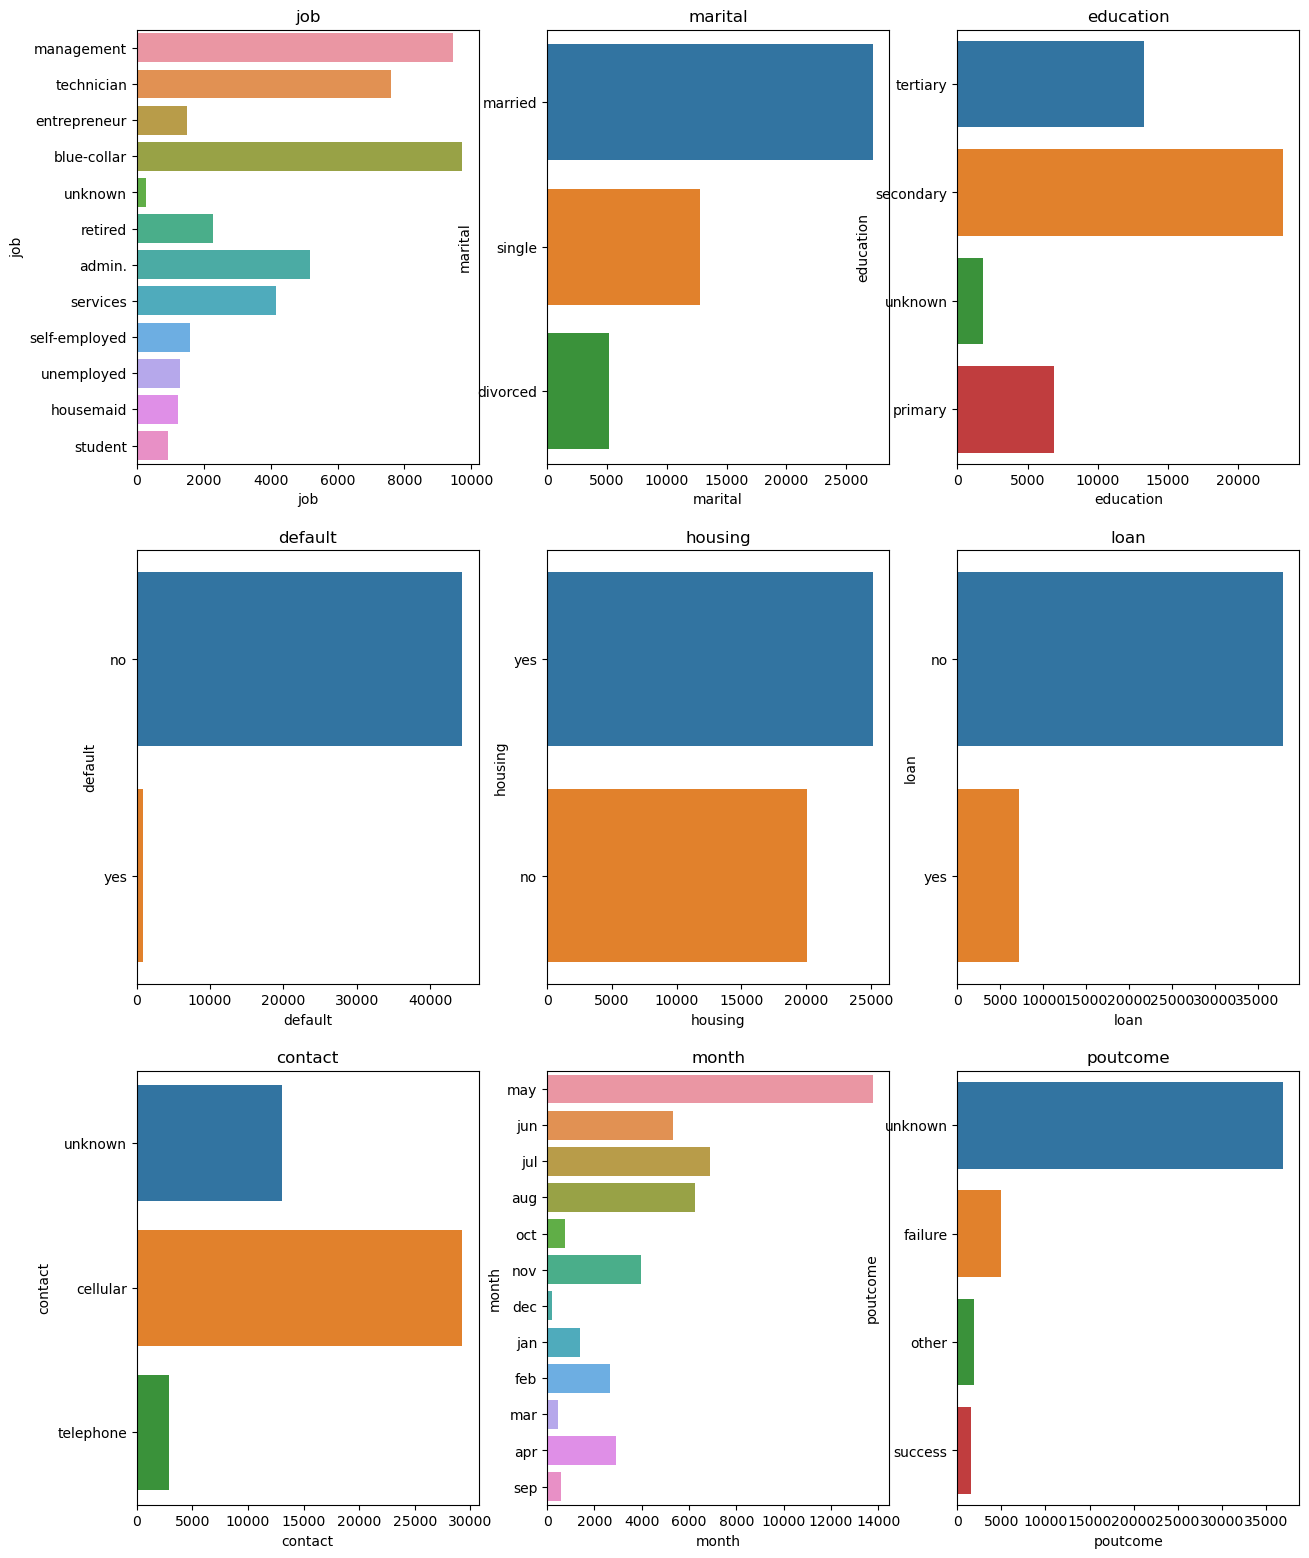

In [23]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away**:
- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

**6. Relationship between Categorical Features and Label**

C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\s

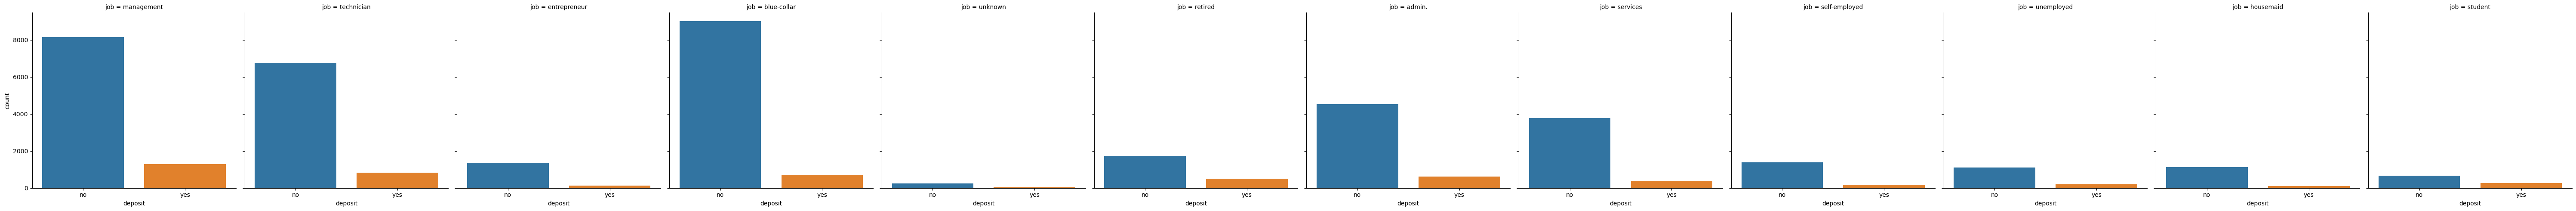

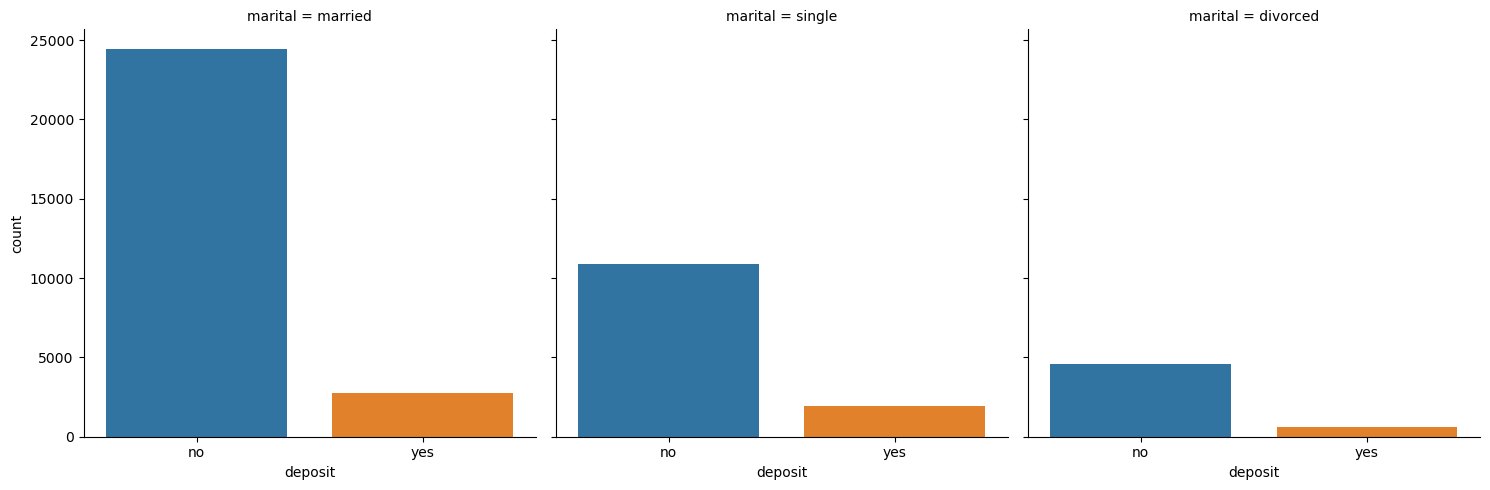

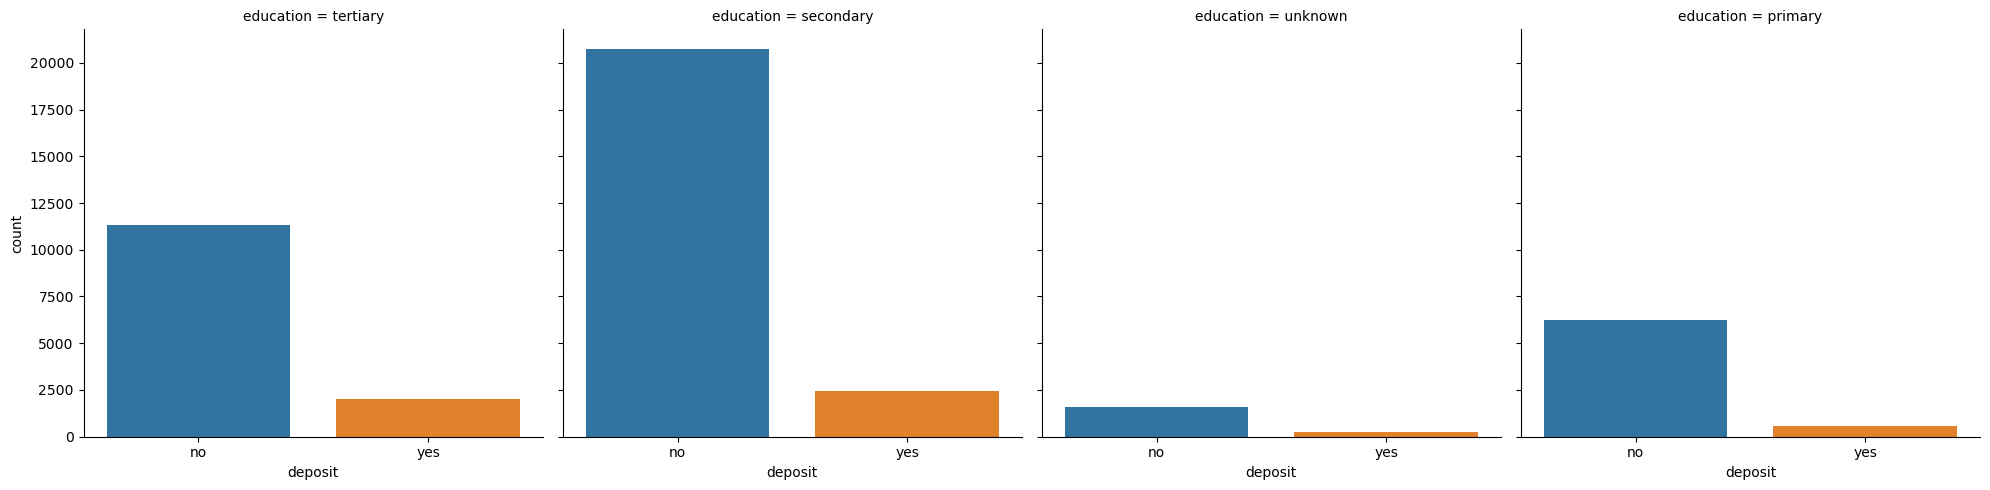

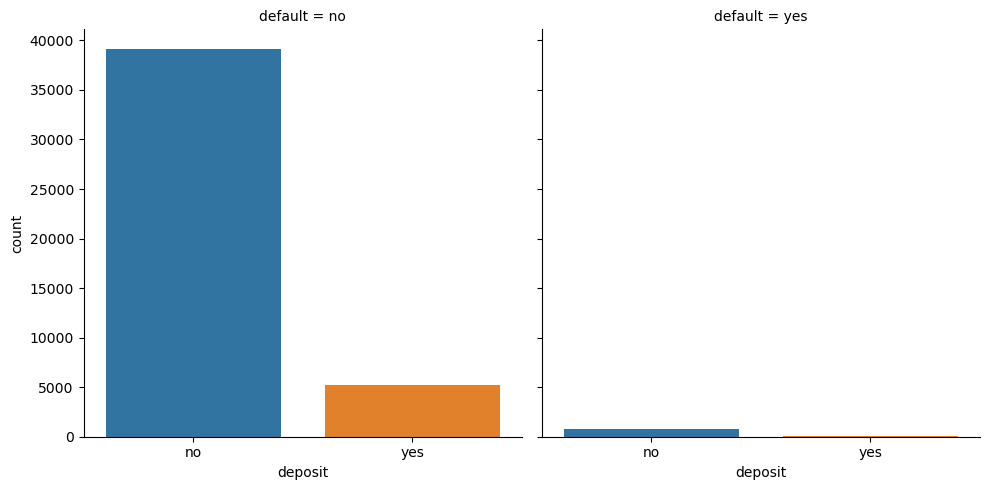

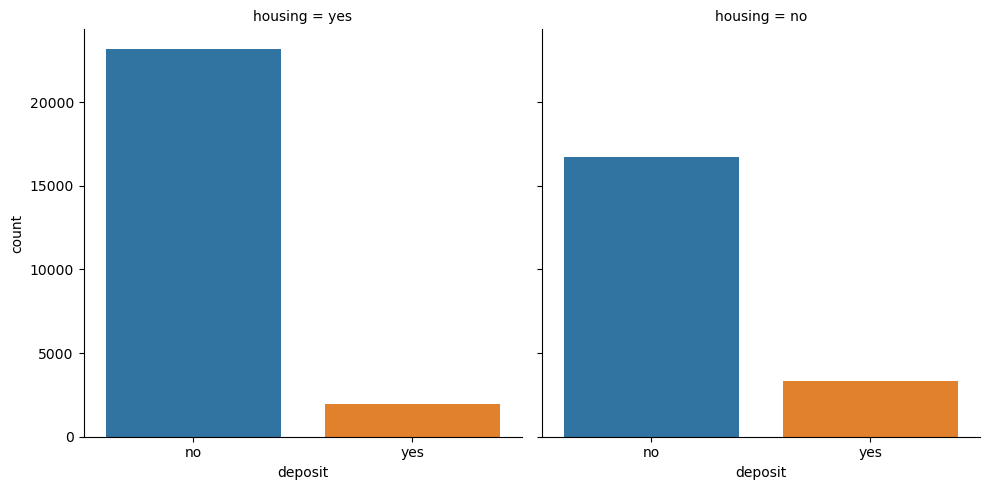

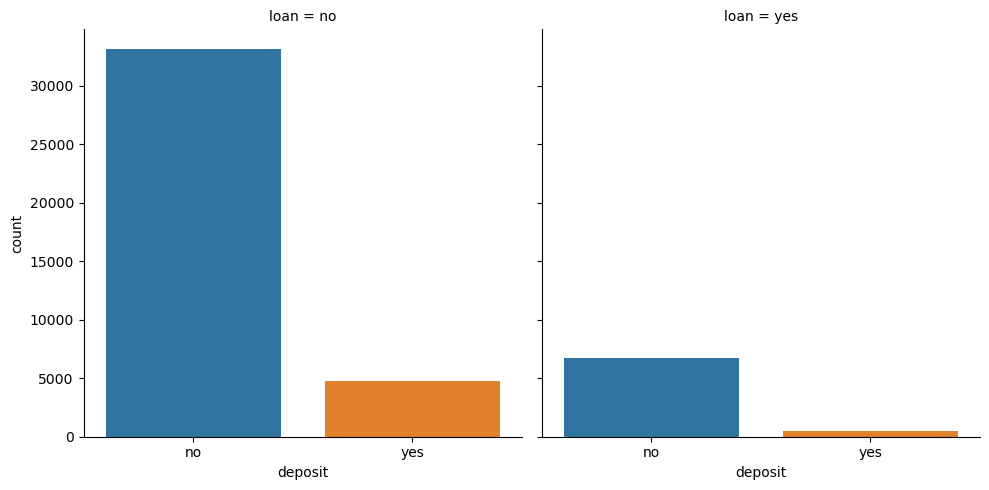

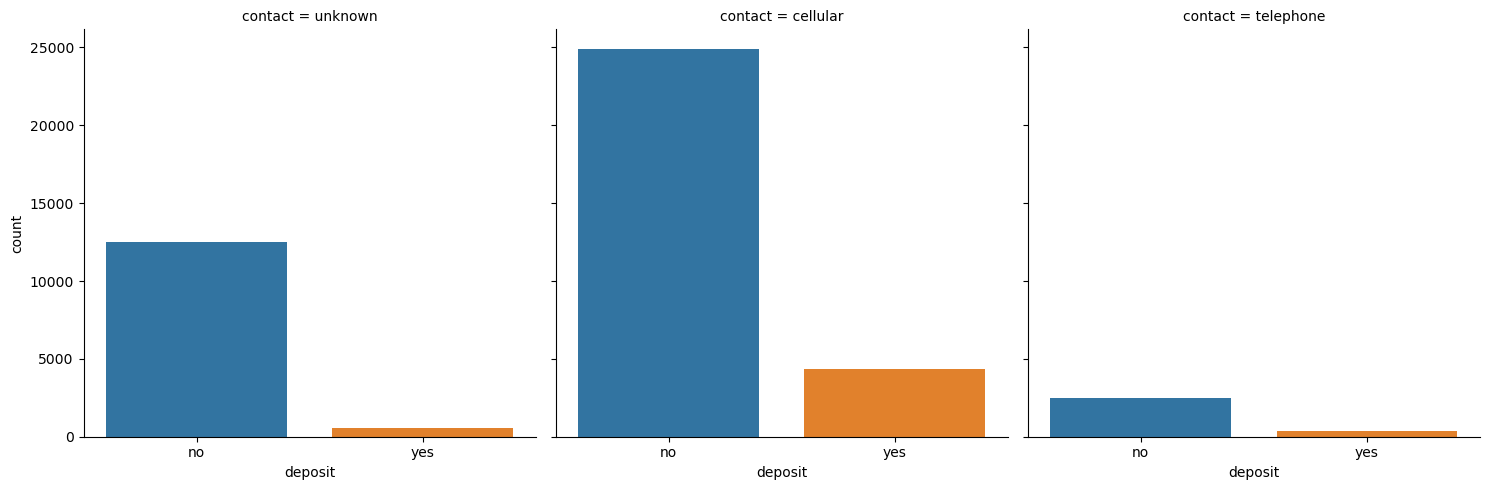

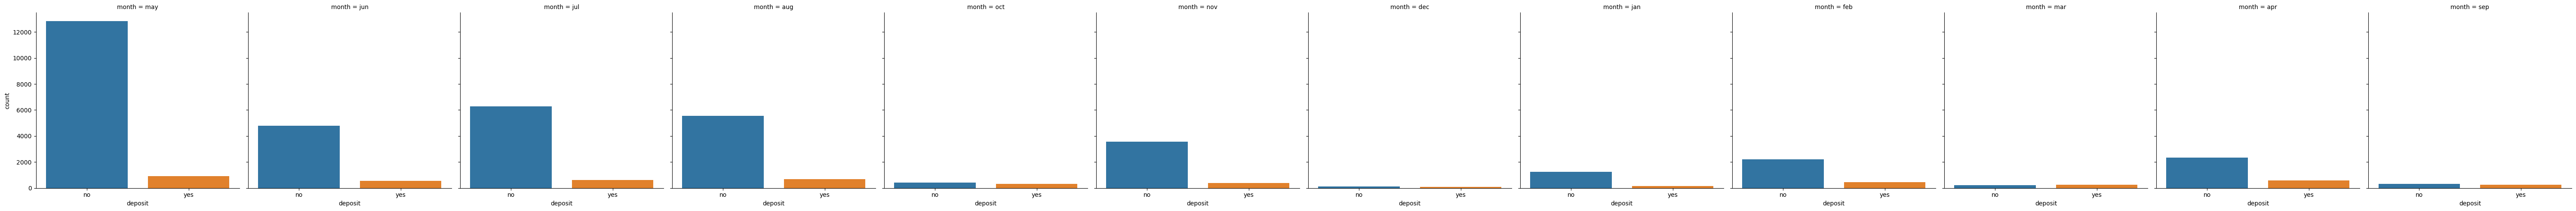

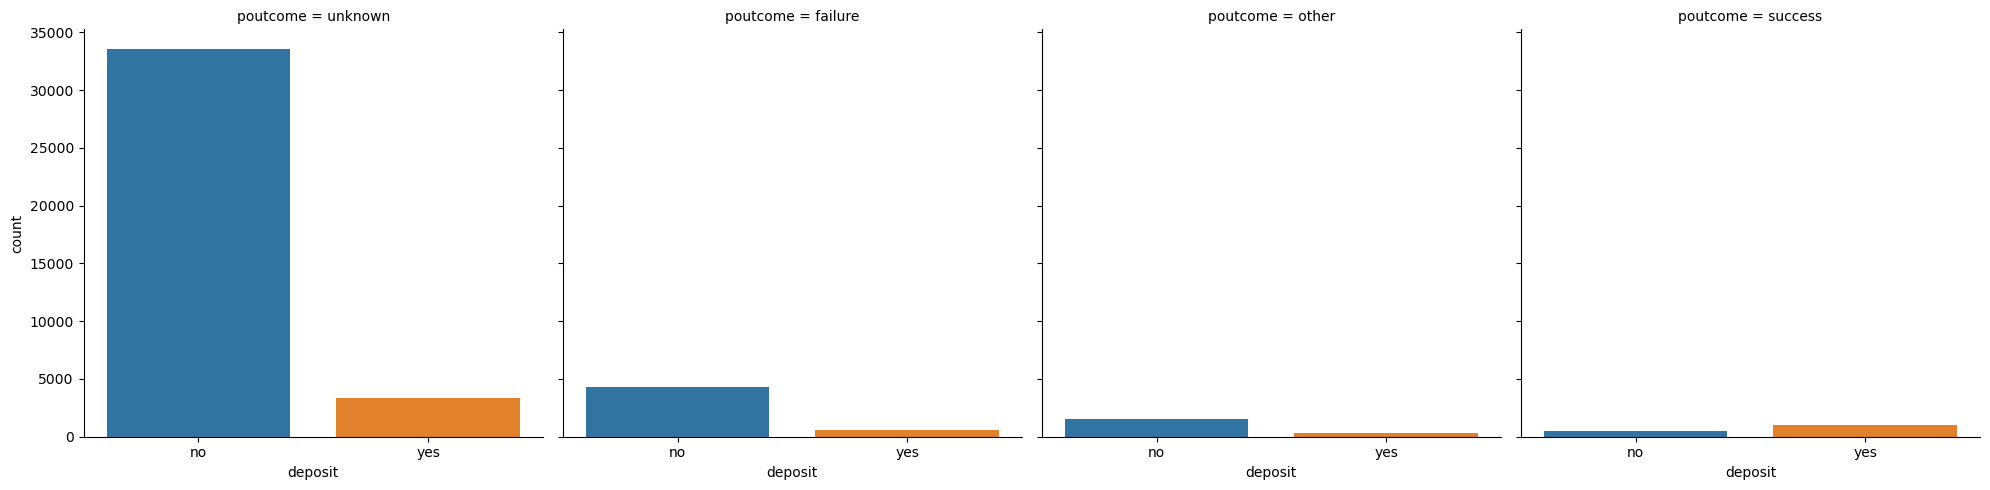

In [24]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [25]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

**Take-away**:
- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

**7. Explore the Numerical Features**

In [26]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**Take-away**:
- there are 7 numerical features

**8. Find Discrete Numerical Features**

In [27]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Take-away**:
- there is no Discrete Variables in give dataset

**9. Relation between Discrete numerical Features and Labels**
- NA

**10. Find Continous Numerical Features**

In [28]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


**Take-away**:
- there are 7 continuous numerical features

**11. Distribution of Continous Numerical Features**

C:\Users\sumon\AppData\Local\Temp\ipykernel_19232\974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\sumon\AppData\Local\Temp\ipykernel_19232\974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\sumon\AppData\L

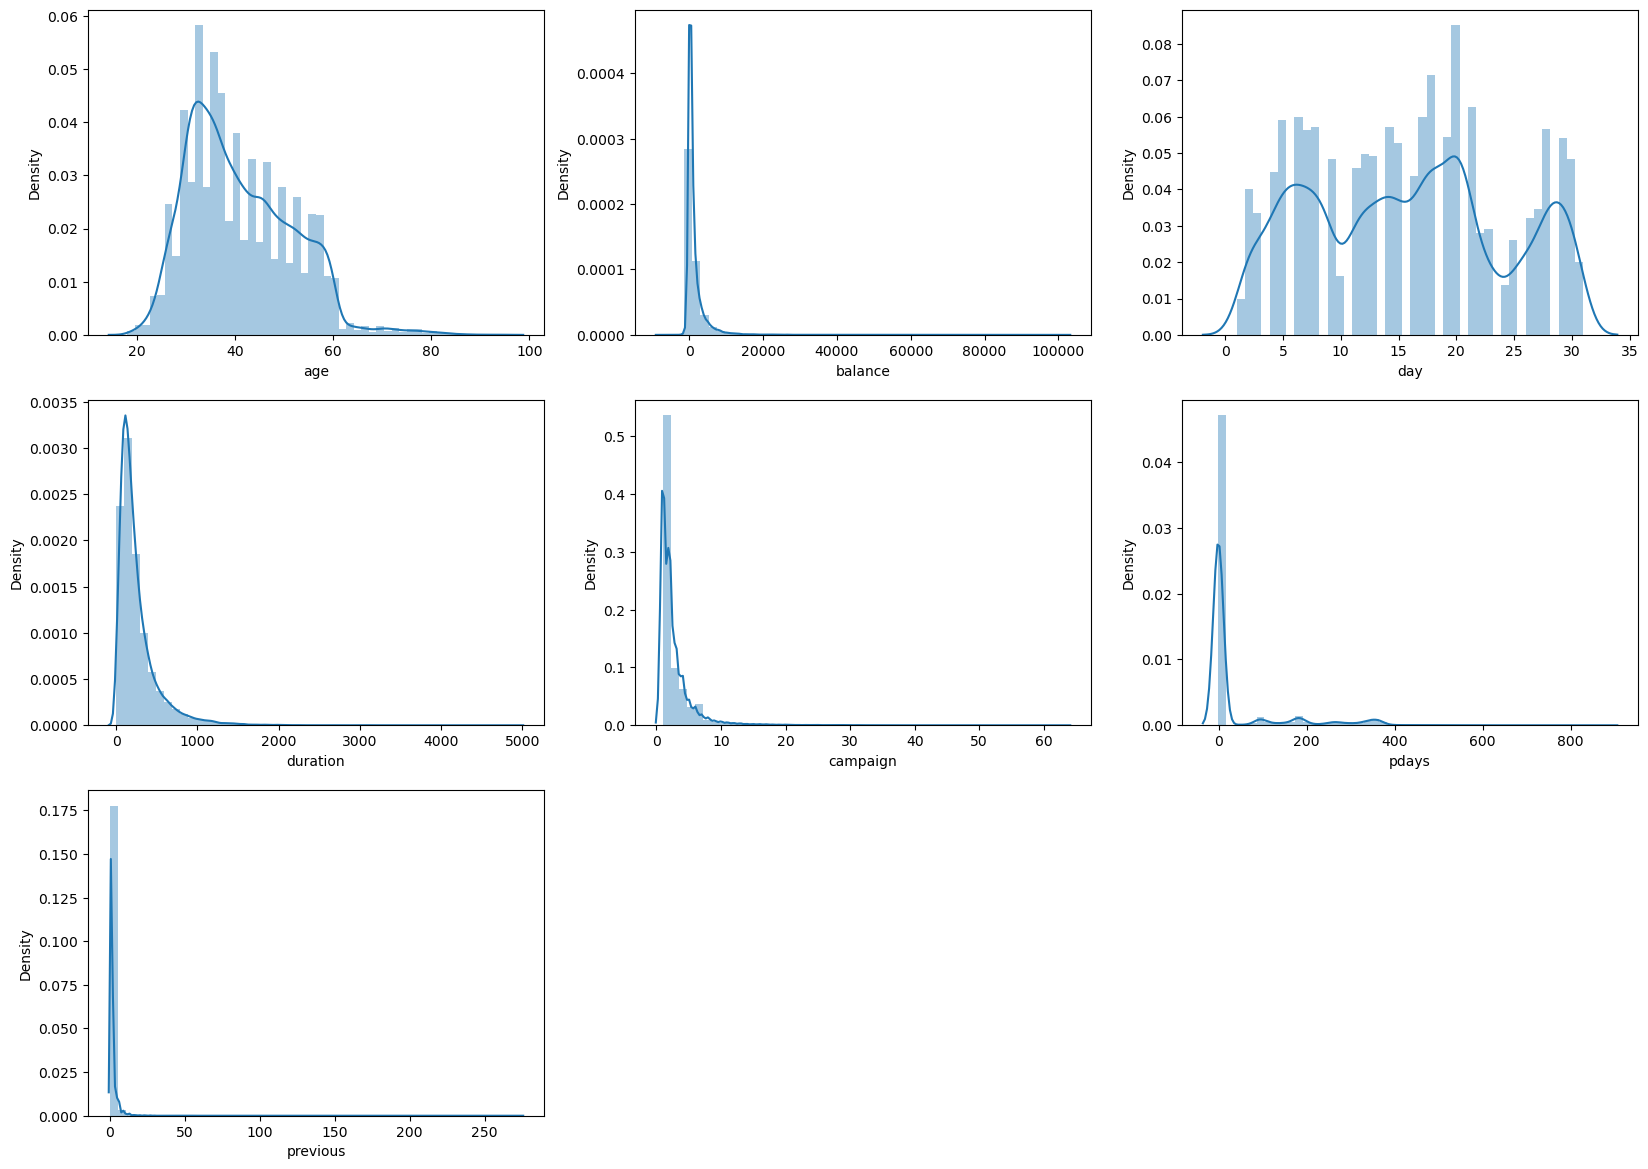

In [29]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Take-away**: 
- it seems age, days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

**12. Relation between Continous numerical Features and Labels**

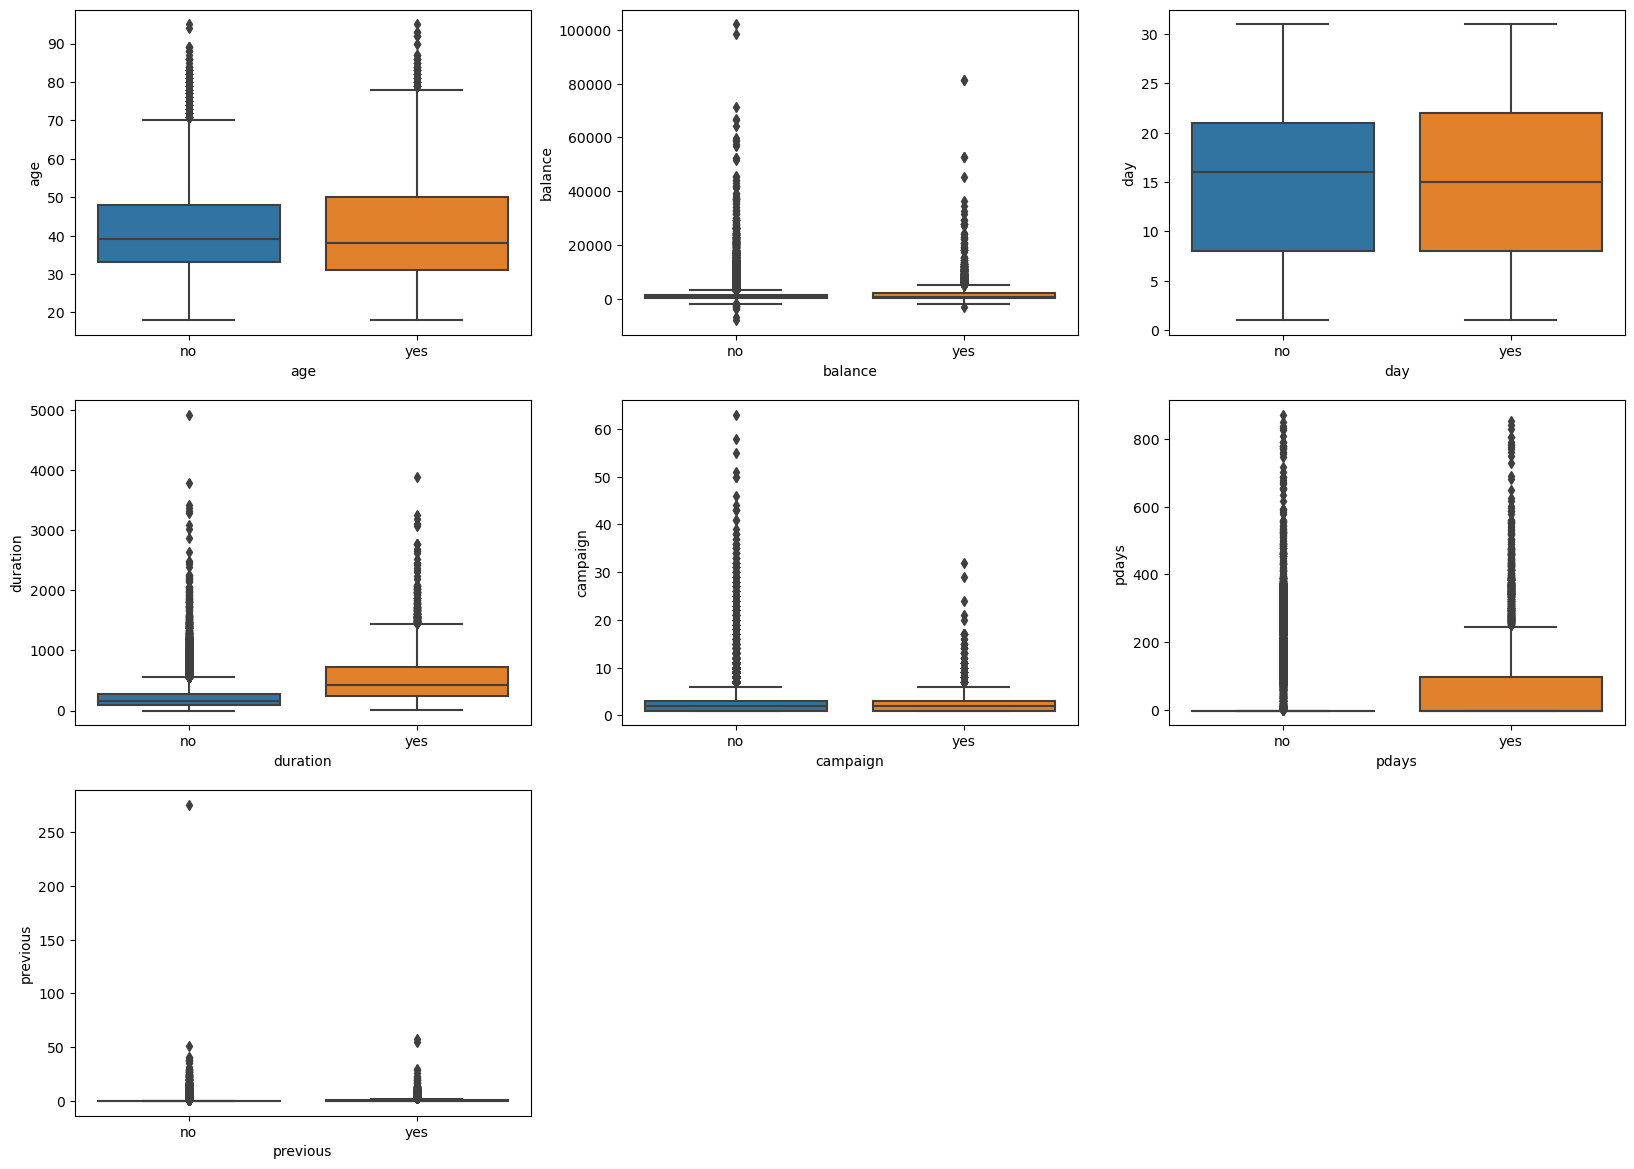

In [30]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away**:
- client shows interest on deposit who had discussion for longer duration

**13. Find Outliers in numerical features**

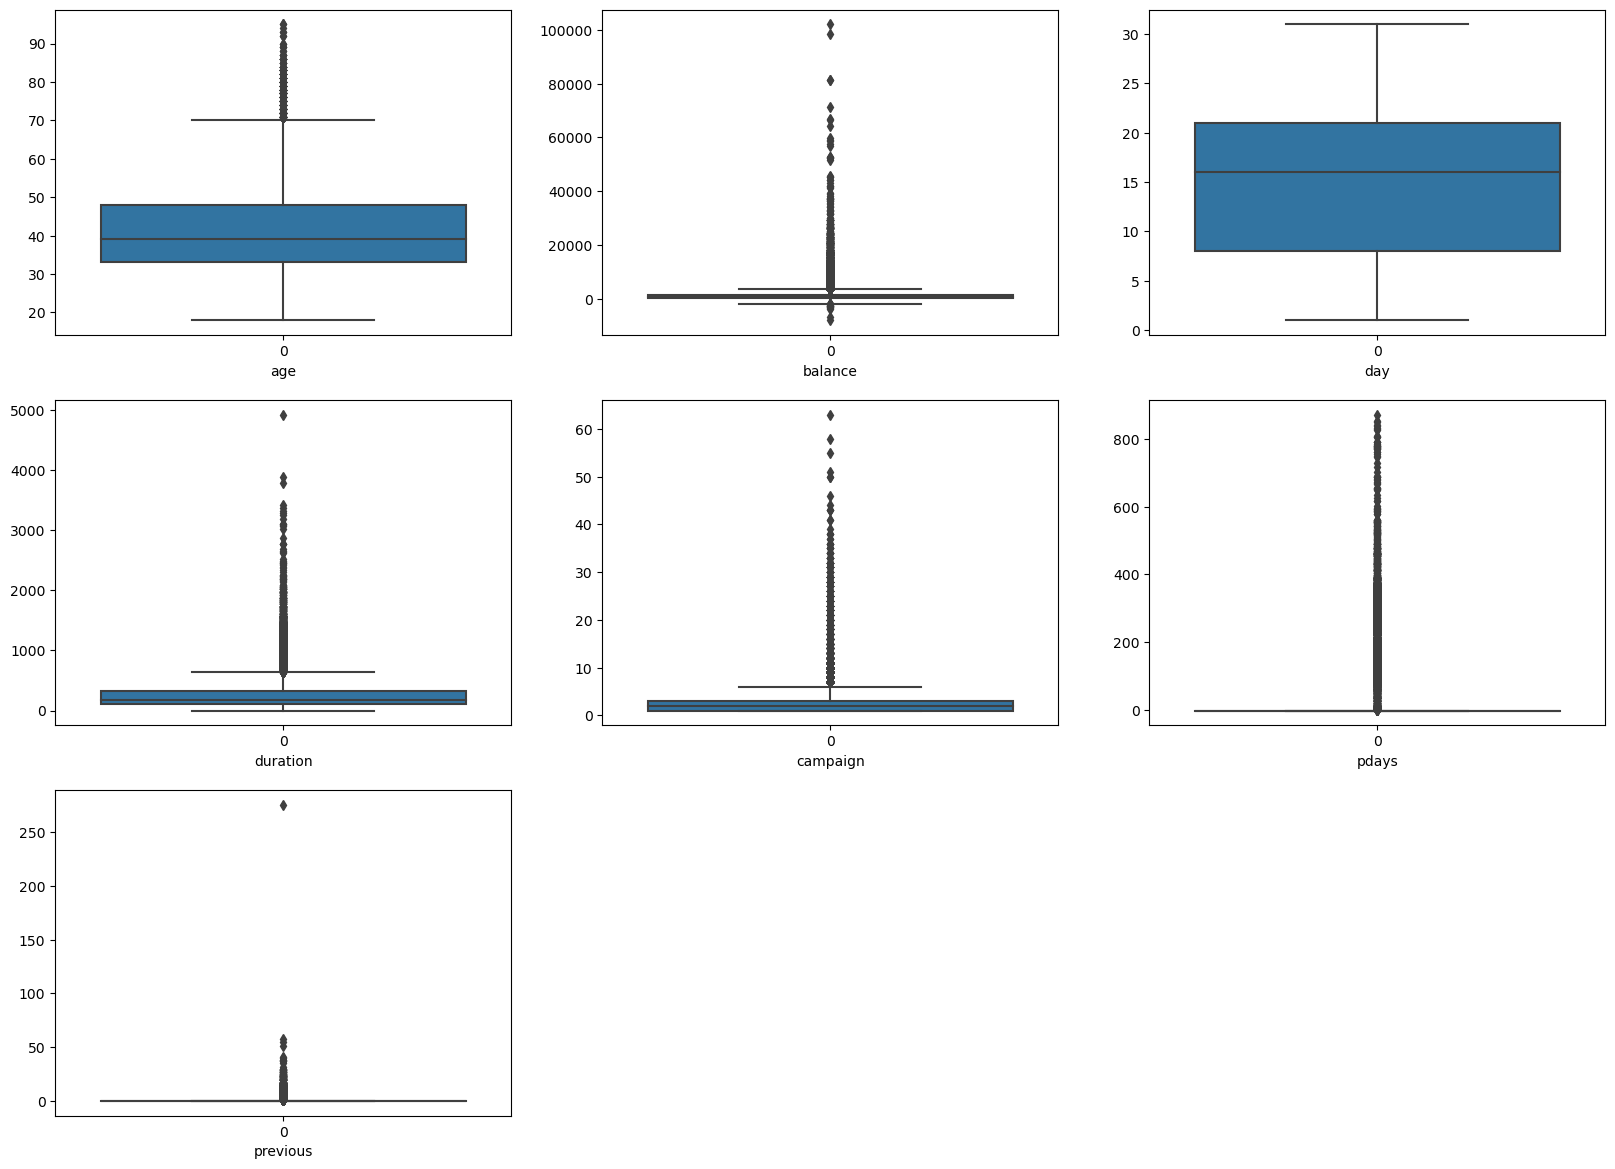

In [31]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Take-away**:
- age, balance, duration, compaign, pdays and previous has some outliers

**14. Explore the Correlation between numerical features**

In [32]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

ValueError: could not convert string to float: 'management'

**Take-away**: 
- it seems no feature is heavily correlated with other features

**15. Check the Data set is balanced or not based on target values in classification**

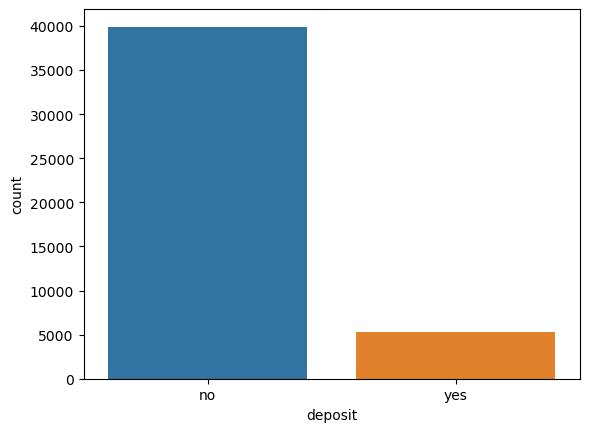

In [34]:
#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()

In [33]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

**Take-away**: 
- given dataset seems to be balanced. 

# Feature Engineering

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

As per Exploratory Data Analysis EDA, 
- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [35]:
df2=df.copy()

In [36]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
df2.shape

(45211, 17)

In [38]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [39]:
df2.drop(['default'],axis=1, inplace=True)

In [40]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [41]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [42]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [43]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

In [44]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

In [45]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [46]:
df3 = df2[df2['campaign'] < 33]

In [47]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

In [48]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           33532
         1            2189
         2            1650
         3             848
         4             543
                     ...  
yes      26              1
         29              1
         30              1
         55              1
         58              1
Name: previous, Length: 66, dtype: int64

In [52]:
df4 = df3[df3['previous'] < 31]

In [53]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [54]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [55]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


# Split Dataset into Training set and Test set

In [56]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [57]:
len(X_train)

36128

In [58]:
len(X_test)

9033

# Model Selection

In [59]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'xgboost'

In [60]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90658732 0.90548021 0.90105176 0.9050519  0.90643599]
0.9049214361441814


In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

In [ ]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [ ]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [ ]:
scores

# Model Building

In [ ]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [ ]:
model_xgb.fit(X_train,y_train)

In [ ]:
model_xgb.score(X_test,y_test)

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

In [ ]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()